# Settings

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
data_path = "data"

if not os.path.exists(data_path):
    os.makedirs(data_path)

In [27]:
landmarks = os.listdir(data_path)

landmarks

['asia_park_in_da_nang',
 'bai_dinh_pagoda',
 'ban_gioc_waterfall',
 'ben_thanh_market',
 'bich_dong_pagoda',
 'christ_of_vung_tau',
 'clay_pagoda_in_soc_trang',
 'cu_chi_tunnels',
 'dalat_railway_station',
 'datanla_waterfall',
 'dragon_bridge_in_da_nang',
 'fansipan_mountain',
 'golden_bridge_in_da_nang',
 'ha_long_bay',
 'hoan_kiem_lake',
 'hoa_lu_ancient_capital',
 'hoi_an_ancient_town',
 'ho_chi_minh_mausoleum',
 'japanese_covered_bridge_in_quang_nam',
 'khai_dinh_tomb',
 'lam_vien_square',
 'landmark_81_in_ho_chi_minh_city',
 'ly_son_island',
 'mui_ne',
 'my_son_sanctuary',
 'nha_rong_harbor',
 'ninh_kieu_market',
 'one-pillar_pagoda',
 'paradise_cave_in_quang_binh',
 'phat_diem_cathedral',
 'po_klong_garai_tower_in_ninh_thuan',
 'pu_luong_rice_terraces',
 'reunification_palace_in_ho_chi_minh_city',
 'saigon_notre_dame_cathedral',
 'sapa_heaven_gate',
 'sapa_stone_church',
 'suoi_tien_theme_park',
 'sơn_đoòng_cave_in_quang_binh',
 'tam_chuc_pagoda',
 'thao_cam_vien_zoo',
 'the_im

## Preprocessing

In [34]:
def normalize_str(str):
    str_list = str.lower().split(" ")

    while "" in str_list:
        str_list.remove("")

    return "_".join(str_list)

In [35]:
import pickle


def save_dict(dict, file_path):
    with open(file_path, "wb") as f:
        pickle.dump(dict, f)


def load_dict(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(f)

In [50]:
anti_gnd = load_dict("annotation/anti_gnd_1_12.pkl")
n_gnd_13_24 = load_dict("annotation/anti_gnd_13_24.pkl")
del n_gnd_13_24["Ban Gioc WaterFall"]

n_gnd_25_36 = load_dict("annotation/anti_gnd_25_36.pkl")
n_gnd_37_48 = load_dict("annotation/anti_gnd_37_48.pkl")

n_gnd_13_24.keys()

dict_keys(["Vuong's Palace in Ha Giang", 'Paradise Cave in Quang Binh', 'Wooden Church in Kontum', 'Japanese Covered Bridge in Quang Nam', 'Thien Mu Pagoda in Hue', ' Dragon Bridge in Da Nang', 'The Imperial City of Hue', 'Golden bridge in Da Nang', 'Hoi An ancient town', 'The Temple of Literature', 'Tam Chuc Pagoda'])

In [47]:
def rename_key(dict, old_key, new_key):
    dict[new_key] = dict.pop(old_key)

In [48]:
def normalize_keys(dict):
    keys = list(dict.keys())
    for key in keys:
        new_key = normalize_str(key)
        rename_key(dict, key, new_key)

In [44]:
def merge_dict(dict1, dict2):
    return dict1.update(dict2)

In [51]:
merge_dict(anti_gnd, n_gnd_13_24)
merge_dict(anti_gnd, n_gnd_25_36)
merge_dict(anti_gnd, n_gnd_37_48)

len(anti_gnd)

47

In [52]:
normalize_keys(anti_gnd)

In [54]:
query = load_dict("annotation/query_1_12.pkl")
query_13_24 = load_dict("annotation/query_13_24.pkl")
del query_13_24["Ban Gioc WaterFall"]

query_25_36 = load_dict("annotation/query_25_36.pkl")
query_37_48 = load_dict("annotation/query_37_48.pkl")

query_13_24.keys()

dict_keys(["Vuong's Palace in Ha Giang", 'Paradise Cave in Quang Binh', 'Wooden Church in Kontum', 'Japanese Covered Bridge in Quang Nam', 'Thien Mu Pagoda in Hue', ' Dragon Bridge in Da Nang', 'The Imperial City of Hue', 'Golden bridge in Da Nang', 'Hoi An ancient town', 'The Temple of Literature', 'Tam Chuc Pagoda'])

In [55]:
merge_dict(query, query_13_24)
merge_dict(query, query_25_36)
merge_dict(query, query_37_48)

normalize_keys(query)

len(query)

47

In [56]:
save_dict(query, "annotation/query.pkl")

In [53]:
save_dict(anti_gnd, "annotation/anti_gnd.pkl")

## Load annotation

In [73]:
anti_gnd = load_dict(file_path="annotation/anti_gnd.pkl")

query = load_dict(file_path="annotation/query.pkl")

In [74]:
landmarks = list(query.keys())

In [75]:
imlist = dict()

for key in landmarks:
    imlist[key] = []
    for filename in os.listdir(os.path.join(data_path, key)):
        file_idx = int(filename.split(".")[0])
        # select only jpg files not in query set
        if filename.endswith(".jpg") and file_idx not in query[key]:
            imlist[key].append(filename)

In [76]:
ground_truth = dict()

for key in landmarks:
    ground_truth[key] = []
    for filename in os.listdir(os.path.join(data_path, key)):
        file_idx = int(filename.split(".")[0])
        # select only jpg files in ground truth set
        if (
            filename.endswith(".jpg")
            and file_idx not in anti_gnd[key]
            and file_idx not in query[key]
        ):
            ground_truth[key].append(filename)

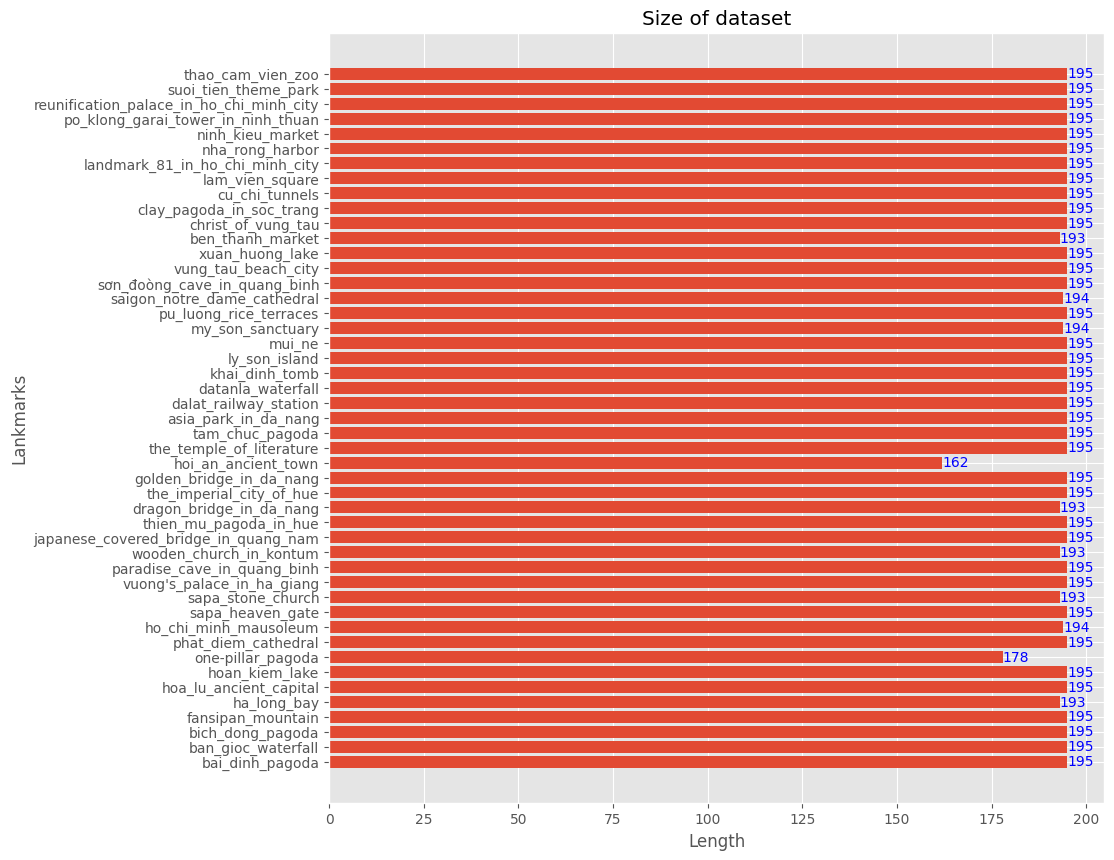

In [78]:
# Get the lengths of each value in imlist
lengths = [len(value) for value in imlist.values()]

# Get the keys of imlist
keys = list(imlist.keys())

plt.figure(figsize=(10, 10))
# Plot the horizontal bar chart
plt.barh(keys, lengths)
plt.xlabel("Length")
plt.ylabel("Lankmarks")
plt.title("Size of dataset")

# Add length numbers at the tip of each bar
for i, v in enumerate(lengths):
    plt.text(v, i, str(v), color="blue", va="center")

plt.show()

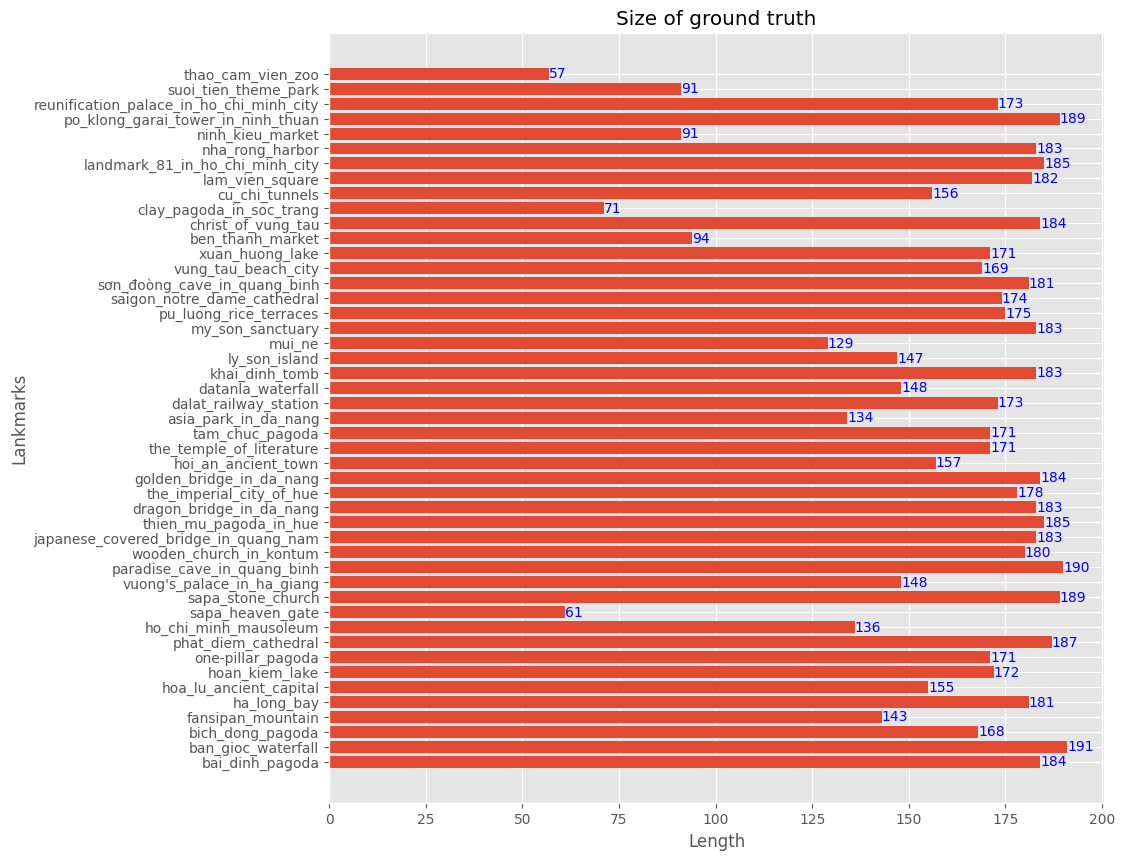

In [79]:
lengths = [len(value) for value in ground_truth.values()]

plt.figure(figsize=(10, 10))
plt.barh(keys, lengths)
plt.xlabel("Length")
plt.ylabel("Lankmarks")
plt.title("Size of ground truth")

for i, v in enumerate(lengths):
    plt.text(v, i, str(v), color="blue", va="center")

plt.show()